In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, HBox, VBox
from IPython.display import display, HTML
import seaborn as sns
from IPython.display import Image
%matplotlib inline

In [3]:
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

In [ ]:
#javascript_functions = {False: "hide()", True: "show()"}
#button_descriptions  = {False: "Show code", True: "Hide code"}


#def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

#    output_string = "<script>$(\"div.input\").{}</script>"
#    output_args   = (javascript_functions[state],)
#    output        = output_string.format(*output_args)

#    display(HTML(output))


#def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

#    state = value.new

#    toggle_code(state)

#    value.owner.description = button_descriptions[state]


#state = False
#toggle_code(state)

#button = widgets.ToggleButton(state, description = button_descriptions[state])
#button.observe(button_action, "value")

#display(button)

In [12]:
df_total = pd.read_csv("../Assets/Output.csv")

# SIRen Epidemiological Model

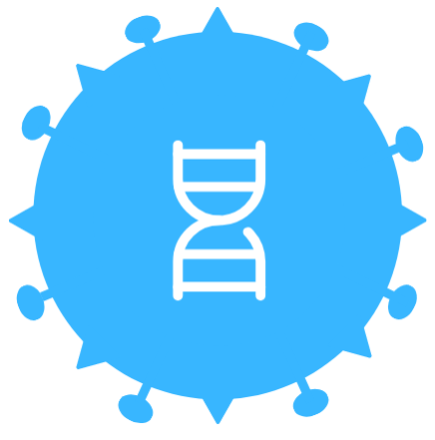

In [4]:
Image("../SIRen.png")

In [13]:
def get_stats(Region = "South Korea"):
    R0 = int(df_total[(df_total["Region"] == Region)]["Recovered"])
    D0 = int(df_total[(df_total["Region"] == Region)]["Deaths"])
    I0 = int(df_total[(df_total["Region"] == Region)]["Confirmed"] - R0 - D0)
    S0 = int(df_total[(df_total["Region"] == Region)]["Population"] - I0 - R0 - D0)
    N = int(df_total[(df_total["Region"] == Region)]["Population"])
    return(N, R0, D0, I0, S0)

In [14]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [15]:
regions = list(df_total["Region"])
regions.sort()

Disclaimer: This website and its contents herein, including all data, mapping, and analysis (“Website”) is provided to the strictly for educational and academic research purposes.  The Website relies upon publicly available data from multiple sources, that do not always agree. SIRen hereby disclaims any and all representations and warranties with respect to the Website, including accuracy, fitness for use, and merchantability.  Reliance on the Website for medical guidance or use of the Website is strictly prohibited.


### In epidemiology, compartmental models can illustrate how the number of patients can evolve over time.

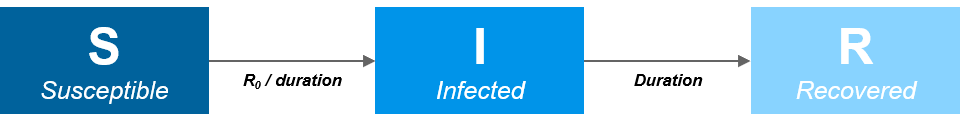

In [16]:
Image("../SIR.png")

## Key Model Parameters

#### R0: The basic reproduction number, R0, is defined as the expected number of people a single infection patient will infect.

#### Duration of illness: The time a person remains infectious.  This paratmeter will determine the velocity of the infection.

In [17]:
Rnaught_slider = widgets.FloatSlider(value= 2, min=0, max=3, step=0.1, description='R0:')
duration_slider = widgets.IntSlider(min=0, max=20, step=1, description='Duration (D):',value=14)
dropdown_region = widgets.Dropdown(options = regions)
time_slider = widgets.IntSlider(value= 500, min=0, max=1000, step=100, description='Window')

## Travel Details

In [18]:
slider_layout_1 = HBox([dropdown_region, time_slider])
slider_layout_1

## Model Inputs

In [19]:
slider_layout_2 = HBox([Rnaught_slider, duration_slider])
slider_layout_2

In [80]:
from IPython.core.display import HTML
HTML('''<script> </script> <form action="javascript:IPython.notebook.execute_cells_below()"><input type="submit" id="toggleButton" value="Refresh"></form>''')

In [81]:
region = str(dropdown_region.value)
N, R0, D0, I0, S0 = get_stats(Region = region)
duration = int(duration_slider.value)
Rnaught = float(Rnaught_slider.value)
time = int(time_slider.value)

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
gamma = float(1/duration)
beta = float(Rnaught*gamma)

# A grid of time points (in days)
t = np.linspace(0, time, time)

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [82]:
print("Currently, there are {0} patients with a confirmed diagnosis of nCoV in {1}.".format(I0, region))

Currently, there are 263 patients with a confirmed diagnosis of nCoV in Beijing.


In [83]:
dataset = pd.DataFrame({'Time': t, 'S': list(S), 'I': list(I), 'R': list(R)}, columns=['Time', 'S', 'I', 'R'])

dataset["Susceptible (Millions)"] = dataset["S"]/10**6
dataset["Infected (Millions)"] = dataset["I"]/10**6
dataset["Recovered (Millions)"] = dataset["R"]/10**6

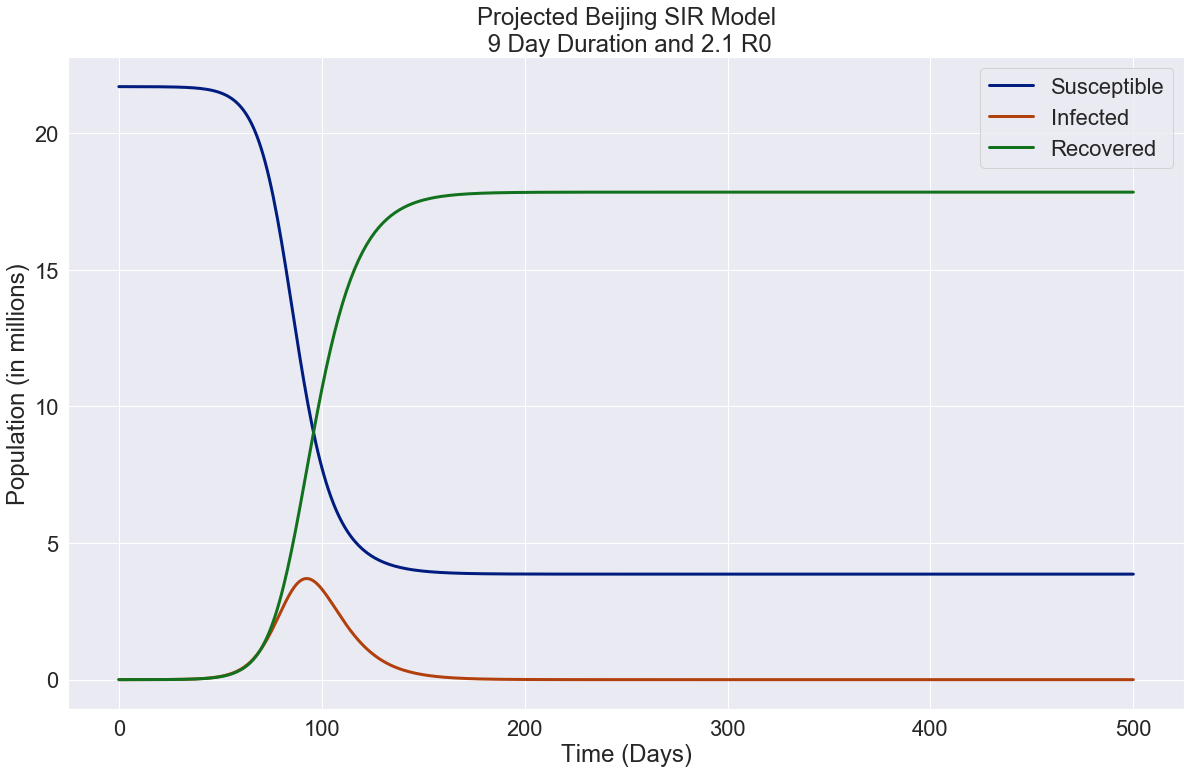

In [84]:
title = "Projected {0} SIR Model\n {1} Day Duration and {2} R0".format(region, duration, Rnaught)
sns.set(font_scale=2)
sns.set_palette("dark")
plt.figure(figsize=(20,12)) 
sns.lineplot(data=dataset, x='Time',y='Susceptible (Millions)', label='Susceptible', lw=3)
sns.lineplot(data=dataset, x='Time',y='Infected (Millions)', label='Infected', lw=3)
sns.lineplot(data=dataset, x='Time',y='Recovered (Millions)', label='Recovered', lw=3)
plt.title(title)
plt.xlabel("Time (Days)")
plt.ylabel("Population (in millions)");